Please find jax implementation of this notebook here: https://colab.research.google.com/github/probml/pyprobml/blob/master/notebooks/book1/01/emnist_viz_jax.ipynb

In [2]:
# https://pytorch.org/tutorials/beginner/basics/data_tutorial.html


import numpy as np
import matplotlib.pyplot as plt

try:
    import probml_utils as pml
except ModuleNotFoundError:
    %pip install -qq git+https://github.com/probml/probml-utils.git
    import probml_utils as pml


try:
    import torch
except ModuleNotFoundError:
    %pip install -qq torch
    import torch
try:
    import torchvision
except ModuleNotFoundError:
    %pip install -qq torchvision
    import torchvision

from torchvision import datasets
from torchvision import transforms

/home/patel_zeel/miniconda3/envs/pymc_exp/lib/python3.8/site-packages/probml_utils/plotting.py:79: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


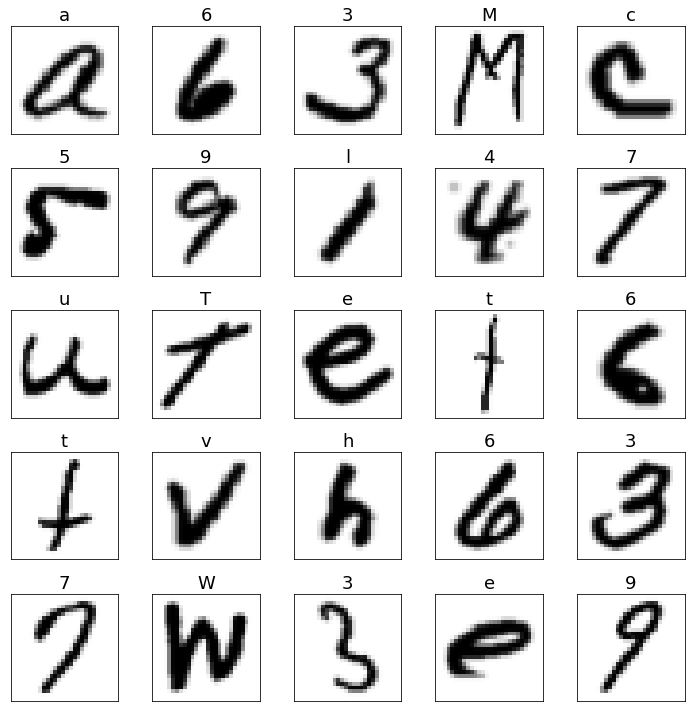

In [3]:
# We need to rotate the images
# https://github.com/pytorch/vision/issues/2630

transform = transforms.Compose(
    [
        lambda img: torchvision.transforms.functional.rotate(img, -90),
        transforms.RandomHorizontalFlip(p=1),
        transforms.ToTensor(),
    ]
)

training_data = datasets.EMNIST(root="~/data", split="byclass", download=True, transform=transform)

figure = plt.figure(figsize=(10, 10))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    # sample_idx = torch.randint(len(training_data), size=(1,)).item()
    sample_idx = i
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    label = training_data.classes[label]
    plt.title(label, fontsize=18)
    # plt.axis("off")
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img.squeeze(), cmap=plt.cm.binary)

plt.tight_layout()
pml.savefig("emnist-data.pdf")
plt.show()